# Quantum walk simulation
From _Photon Propagation in a Discrete Fiber Network: An Interplay of Coherence and Losses_ by Regensburger et al.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

With gain $g=1$ and $\alpha=0$:

In [89]:
size = 40
steps = 60
u = np.zeros((steps, size*2+1), dtype=complex)
v = np.zeros((steps, size*2+1), dtype=complex)

alpha = 0

# Initial state
v[0][size] = 1

In [90]:
for m in range(steps-1):
    for n in range(1,2*size):
        u[m+1][n] = (u[m][n+1]+1j*v[m][n+1])/np.sqrt(2)
        v[m+1][n] = (v[m][n-1]+1j*u[m][n-1])/np.sqrt(2)


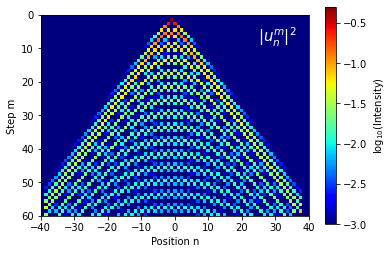

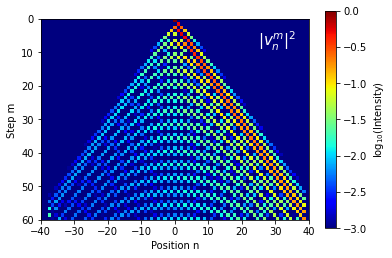

In [91]:
U = np.abs(u)**2
U[U < 1e-3] = 1e-3
V = np.abs(v)**2
V[V < 1e-3] = 1e-3

plt.figure()
plt.imshow(np.log10(U), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|u_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.figure()
plt.imshow(np.log10(V), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|v_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.show()

---
With gain $g=0.95$ and $\alpha=2\pi/32$

In [103]:
size = 20
steps = 70
u = np.zeros((steps, size*2+1), dtype=complex)
v = np.zeros((steps, size*2+1), dtype=complex)

alpha = 2*np.pi/32
g = 0.95

# Initial state
v[0][size] = 1

In [104]:
for m in range(steps-1):
    for n in range(1,2*size):
        u[m+1][n] = (u[m][n+1]+1j*v[m][n+1])/np.sqrt(2) * np.sqrt(g)
        v[m+1][n] = (v[m][n-1]+1j*u[m][n-1])/np.sqrt(2) * np.exp(1j*(n-size)*alpha) * np.sqrt(g)


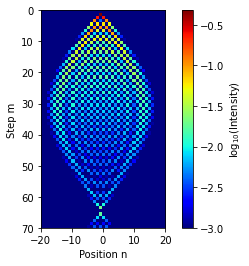

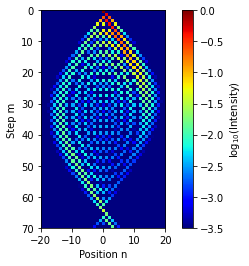

In [105]:
U = np.abs(u)**2
U[U < 10**-3] = 10**-3
V = np.abs(v)**2
V[V < 10**-3.5] = 10**-3.5

plt.figure()
plt.imshow(np.log10(U), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|u_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.figure()
plt.imshow(np.log10(V), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|v_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.show()

---
Case with losses (second part of the paper):

In [95]:
size = 30
steps = 70
a = np.zeros((steps, size*2+1), dtype=complex)
q = np.zeros((steps, size*2+1), dtype=complex)

alpha = 0

# Initial state
a[0][size] = 1

In [96]:
for m in range(steps-1):
    for n in range(1,2*size):
        a[m+1][n] = 1j/2 * (a[m][n-1]+a[m][n+1]) * np.exp(1j*(n-size)*alpha)
        q[m+1][n] =  1/2 * (a[m][n-1]-a[m][n+1])

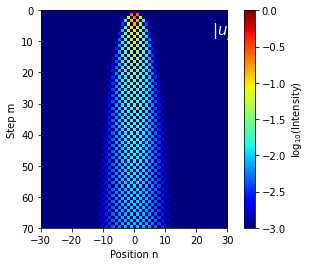

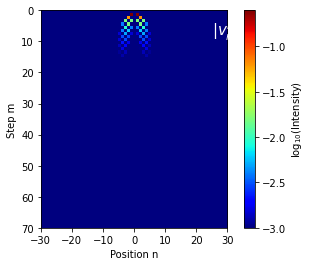

In [97]:
A = np.abs(a)**2
A[A < 1e-3] = 1e-3
Q = np.abs(q)**2
Q[Q < 1e-3] = 1e-3

plt.figure()
plt.imshow(np.log10(A), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|u_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.figure()
plt.imshow(np.log10(Q), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|v_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.show()

In [109]:
size = 25
steps = 30
a = np.zeros((steps, size*2+1), dtype=complex)
q = np.zeros((steps, size*2+1), dtype=complex)

alpha = 7*np.pi/26
g = 3.4

# Initial state
a[0][size] = 1

In [110]:
for m in range(steps-1):
    for n in range(1,2*size):
        a[m+1][n] = 1j/2 * (a[m][n-1]+a[m][n+1]) * np.exp(1j*(n-size)*alpha) * np.sqrt(g)
        q[m+1][n] =  1/2 * (a[m][n-1]-a[m][n+1]) * np.sqrt(g)

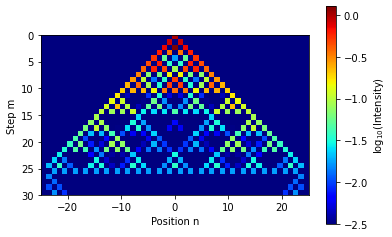

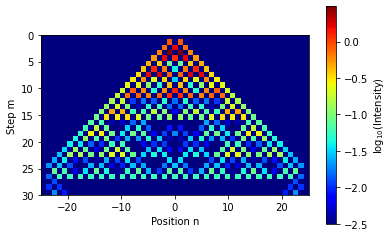

In [111]:
A = np.abs(a)**2
A[A < 10**-2.5] = 10**-2.5
Q = np.abs(q)**2
Q[Q < 10**-2.5] = 10**-2.5

plt.figure()
plt.imshow(np.log10(A), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|u_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.figure()
plt.imshow(np.log10(Q), cmap='jet', extent=[-size, size, steps, 0])
plt.colorbar(label='$\log_{10}$(Intensity)')
plt.text(25, 8, "$|v_n^m|^2$", color='white', fontsize=15)
plt.xlabel('Position n')
plt.ylabel('Step m')

plt.show()

Putting all together in a same function:

In [101]:
def fiber_qw_sim(size, steps, alpha, gain, losses=False, threshold=1e-3):
    if not losses:
        u = np.zeros((steps, size*2+1), dtype=complex)
        v = np.zeros((steps, size*2+1), dtype=complex)

        # Initial state
        v[0][size] = 1

        for m in range(steps-1):
            for n in range(1,2*size):
                u[m+1][n] = (u[m][n+1]+1j*v[m][n+1])/np.sqrt(2) * np.sqrt(gain)
                v[m+1][n] = (v[m][n-1]+1j*u[m][n-1])/np.sqrt(2) * np.exp(1j*(n-size)*alpha) * np.sqrt(gain)

        U = np.abs(u)**2
        U[U < threshold] = threshold
        V = np.abs(v)**2
        V[V < threshold] = threshold

        plt.figure()
        plt.imshow(np.log10(U), cmap='jet', extent=[-size, size, steps, 0])
        plt.colorbar(label='$\log_{10}$(Intensity)')
        plt.text(0.8, 0.9, "$|u_n^m|^2$", color='white', transform=plt.gca().transAxes, fontsize=15)
        plt.xlabel('Position n')
        plt.ylabel('Step m')

        plt.figure()
        plt.imshow(np.log10(V), cmap='jet', extent=[-size, size, steps, 0])
        plt.colorbar(label='$\log_{10}$(Intensity)')
        plt.text(0.8, 0.9, "$|v_n^m|^2$", color='white', transform=plt.gca().transAxes, fontsize=15)
        plt.xlabel('Position n')
        plt.ylabel('Step m')

        plt.show()

    else:
        a = np.zeros((steps, size*2+1), dtype=complex)
        q = np.zeros((steps, size*2+1), dtype=complex)

        # Initial state
        a[0][size] = 1

        for m in range(steps-1):
            for n in range(1,2*size):
                a[m+1][n] = 1j/2 * (a[m][n-1]+a[m][n+1]) * np.exp(1j*(n-size)*alpha) * np.sqrt(gain)
                q[m+1][n] =  1/2 * (a[m][n-1]-a[m][n+1])

        A = np.abs(a)**2
        A[A < threshold] = threshold
        Q = np.abs(q)**2
        Q[Q < threshold] = threshold

        plt.figure()
        plt.imshow(np.log10(A), cmap='jet', extent=[-size, size, steps, 0])
        plt.colorbar(label='$\log_{10}$(Intensity)')
        plt.text(0.85, 0.85, "$|a_n^m|^2$", color='white', transform=plt.gca().transAxes, fontsize=15)
        plt.xlabel('Position n')
        plt.ylabel('Step m')

        plt.figure()
        plt.imshow(np.log10(Q), cmap='jet', extent=[-size, size, steps, 0])
        plt.colorbar(label='$\log_{10}$(Intensity)')
        plt.text(0.85, 0.85, "$|q_n^m|^2$", color='white', transform=plt.gca().transAxes, fontsize=15)
        plt.xlabel('Position n')
        plt.ylabel('Step m')

        plt.show()

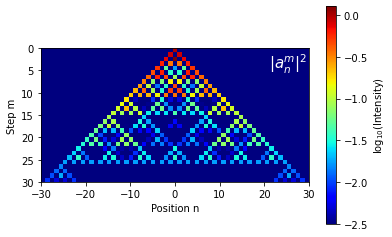

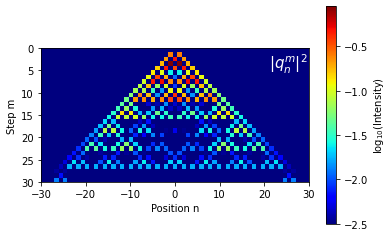

In [102]:
fiber_qw_sim(size=30, steps=30, alpha=7*np.pi/26, gain=3.4, losses=True, threshold=10**(-2.5))